In [2]:
import numpy as np
import pyscipopt 
import matplotlib.pyplot as plt

# Expected reward matrix

In [3]:
# A_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1],
#                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0]]) 

# A_2 = np.array([[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

A_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1],
                [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0]]) # Adding null path 

A_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
# zeros_ = np.zeros_like(A_1)
# A_1_extended = np.concatenate((A_1, zeros_))
# A_2_extended = np.concatenate((zeros_, A_2))
# A = 1 /2 * np.concatenate((A_1_extended, A_2_extended), axis=1).T
A_r = A_1.T
A = np.load("bluff_lp/game_matrices/2f/2_2.npy")

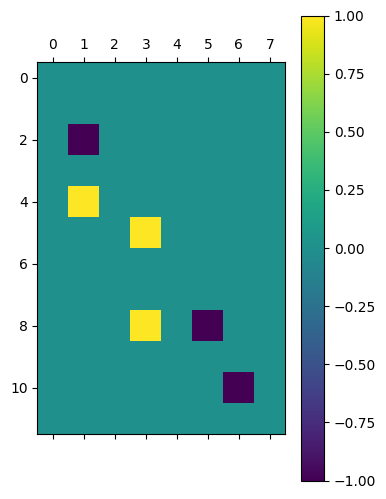

In [5]:
plt.matshow(A)
plt.colorbar()

In [6]:
E = np.load("bluff_lp/game_constraints/2f/x.npy")
F = np.load("bluff_lp/game_constraints/2f/y.npy")

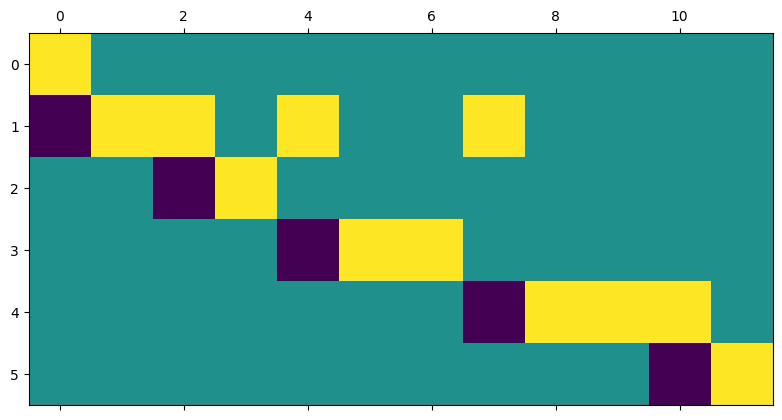

In [7]:
plt.matshow(E)

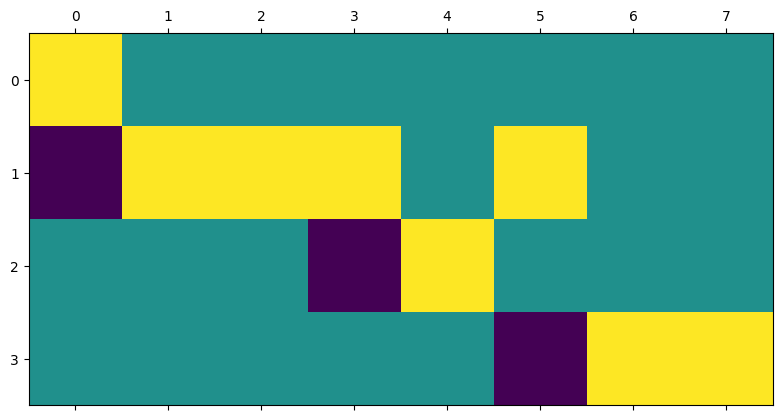

In [8]:
plt.matshow(F)

# Network flow constraints

In [9]:
# E = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#               [-1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
#               [0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0],
#               [0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#               [0, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0], 
#               [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0]])

# # E = np.array([[0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0],
# #               [1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
# #               [0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0], 
# #               [0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0]])
_, m = E.shape

e = np.array([[1], [0], [0], [0], [0], [0]])
# e = np.array([[0], [0], [0], [0],]) 

# zeros_e = np.zeros_like(E)
# E_ext_1 = np.concatenate((E, zeros_e))
# E_ext_2 = np.concatenate((zeros_e, E))
# E = np.concatenate((E_ext_1, E_ext_2), axis=1)

# e = np.concatenate((e, e))

In [19]:
print(E.shape)

(6, 12)


In [10]:
# F = np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
#               [-1, 1, 1, 1, 1, 0, 0, 0],
#               [0, -1, 0, 0, 0, 1, 1, 0], 
#               [0, 0, -1, 0, 0, 0, 0, 1]])
# # F = np.array([[-1, 0, 0, 0, 1, 1, 0], 
# #               [0, -1, 0, 0, 0, 0, 1]])
_, n = F.shape

# f = np.array([[0], [0]])
f = np.array([[1], [0], [0], [0]]) 

# zeros_f = np.zeros_like(F)
# F_ext_1 = np.concatenate((F, zeros_f))
# F_ext_2 = np.concatenate((zeros_f, F))
# F = np.concatenate((F_ext_1, F_ext_2), axis=1)

# f = np.concatenate((f, f))

In [20]:
F.shape

(4, 8)

In [11]:
# E = np.array([
#             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0 ,0, 0 ,0 ,0, 0, 0, 0, 0, 1, 1, 1, 1],
#             [0, -1, 0, 0, 0, 0, 0, 0, 1, 1 , 1, 1 ,0, 0 ,0 ,0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0],
#             [0, 0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0], 
#             [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0],
#             ])
# _, m = E.shape

# e = np.array([[1], [1], [0], [0], [0], [0], [0], [0]]) / 2

In [12]:
# F = np.array([
#             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#             [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#             [-1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#             [0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
#             [0, 0, -1, 0, 0, 0, 1, 1, 0, -1, 0, 0, 0, 1, 1, 0], 
#             [0, 0, 0, -1, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 1],
#             ])
# _, n = F.shape

# f = np.array([[1], [1], [0], [0], [0], [0]]) / 2

# Building the model

## Variables

In [13]:
lp = pyscipopt.Model()
x = {i: lp.addVar(f"x[{i}]", vtype="C", lb=0.0, ub=1.0) for i in range(m)}
q = {k: lp.addVar(f"q[{k}]", vtype="C", lb=-lp.infinity(), ub=lp.infinity()) for k in range(f.shape[0])}

## Objective

In [14]:
lp.setObjective(-pyscipopt.quicksum(e[k, 0] * q[k] for k in range(f.shape[0])))
lp.setMaximize()

## Constraints

In [15]:
for i in range(n):
    lp.addCons(pyscipopt.quicksum(-A[j, i] * x[j] for j in range(m)) -
               pyscipopt.quicksum(F[k, i] * q[k] for k in range(f.shape[0])) <= 0)

for i in range(E.shape[0]):
    lp.addCons(pyscipopt.quicksum(E.T[j, i] * x[j] for j in range(m)) == e[i, 0])

## Optimization

In [16]:
lp.optimize()

presolving:
(round 1, fast)       7 del vars, 7 del conss, 0 add conss, 5 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 2, fast)       9 del vars, 9 del conss, 0 add conss, 6 chg bounds, 2 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 3, fast)       13 del vars, 13 del conss, 0 add conss, 6 chg bounds, 2 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 4, fast)       15 del vars, 14 del conss, 0 add conss, 6 chg bounds, 2 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
presolving (5 rounds: 5 fast, 1 medium, 1 exhaustive):
 16 deleted vars, 14 deleted constraints, 0 added constraints, 6 tightened bounds, 0 added holes, 2 changed sides, 0 changed coefficients
 0 implications, 0 cliques
transformed 1/1 original solutions to the transformed problem space
Presolving Time: 0.00

SCIP Status        : problem is solved [optimal solution found]
Solving Time (sec) : 0.02
Solving Nodes      : 0
Primal Bound       : +0.000000000000

# Results

In [18]:
{i: lp.getVal(x[i]) for i in range(m)}

{0: 1.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 1.0,
 5: 1.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0}

In [19]:
{i: lp.getVal(q[i]) for i in range(f.shape[0])}

{0: -0.0, 1: -0.0, 2: -0.0, 3: 0.0}

# Dual problem

## Variables

In [26]:
lp = pyscipopt.Model()
y = {i: lp.addVar(f"x[{i}]", vtype="C", lb=0.0, ub=1.0) for i in range(n)}
p = {k: lp.addVar(f"q[{k}]", vtype="C", lb=-lp.infinity(), ub=lp.infinity()) for k in range(e.shape[0])}

## Objective

In [27]:
lp.setObjective(-pyscipopt.quicksum(e[k, 0] * p[k] for k in range(e.shape[0])))
lp.setMinimize()

## Constraints

In [28]:
for i in range(m):
    lp.addCons(pyscipopt.quicksum(-A[i, j] * y[j] for j in range(n)) +
               pyscipopt.quicksum(E[k, i] * p[k] for k in range(e.shape[0])) >= 0)

for i in range(F.shape[0]):
    lp.addCons(pyscipopt.quicksum(F[i, j] * y[j] for j in range(n)) == f[i, 0])

## Optimization

In [29]:
lp.optimize()

presolving:
problem infeasible or unbounded: variable <t_q[0]> with objective -1 can be made infinitely large
presolving (1 rounds: 1 fast, 0 medium, 0 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolving detected unboundedness (or infeasibility)
Presolving Time: 0.00

SCIP Status        : problem is solved [infeasible or unbounded]
Solving Time (sec) : 0.00
Solving Nodes      : 0
Primal Bound       : +1.00000000000000e+20 (0 solutions)
Dual Bound         : -1.00000000000000e+20
Gap                : infinite


## Results

In [30]:
{i: lp.getVal(y[i]) for i in range(n)}

Warning: ('Method cannot be called in stage ', 10)